In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as st
from scipy.stats import normaltest
from scipy.stats import spearmanr


## Corrélation sans les clients bussiness
### Variable quantitative / quantitative
###  

In [2]:
sns.set( 
    style='whitegrid',
    context='notebook',
    palette=['#c2a87c','#423217','#8F7C5B','#423A2A','#CC9B45'],
    rc={'figure.figsize':(14,6),'axes.facecolor':'grey', 'figure.facecolor':'grey'})

In [3]:
t_b2b= pd.read_csv('/home/david/OC/P6_Terrasson_David/cours_annexes/t_b2b.csv',index_col='date')
t_b2c= pd.read_csv('/home/david/OC/P6_Terrasson_David/cours_annexes/t_b2c.csv',index_col='date')
global_t= pd.read_csv('/home/david/OC/P6_Terrasson_David/cours_annexes/global_t.csv',index_col='date')
global_t_client= pd.read_csv('/home/david/OC/P6_Terrasson_David/cours_annexes/global_t_client.csv')

In [4]:
business =['c_1609','c_6714','c_3454','c_4958']
transactions_b2c= global_t[~global_t['client_id'].isin(business)]
transactions_b2c.head(2)

session_id  month  month_part  weekday  hour  \
date                                                                      
2021-03-22 01:40:22.782925     s_9707      3           2        0     1   
2023-02-22 01:40:22.782925   s_345108      2           2        2     1   

                           client_id sex   age age_group product_id  price  \
date                                                                         
2021-03-22 01:40:22.782925    c_4410   f  55.0     51-70      1_385  25.99   
2023-02-22 01:40:22.782925    c_4410   f  55.0     51-70      1_385  25.99   

                           price_group  categ  
date                                           
2021-03-22 01:40:22.782925           L    1.0  
2023-02-22 01:40:22.782925           L    1.0

In [5]:
temp = global_t.groupby(['client_id','session_id']).agg({'product_id':'count','price':sum}).reset_index()

In [6]:
data_client = temp.groupby('client_id').agg({'session_id':'count','product_id':sum,'price':sum})
data_client.head(2)

session_id  product_id    price
client_id                                 
c_1                33          39   558.18
c_10               34          58  1353.60

In [7]:
data_client = data_client.merge(global_t_client, on='client_id',how='left')

In [8]:
data_client.rename(columns={"session_id":"freq_achat","id_prod":"taille_panier","price":"ca_client2"},inplace=True)
data_client['panier_moyen']=round(data_client['ca_client']/data_client['freq_achat'])

In [9]:
data_client=data_client.drop(columns=['product_id','ca_client2'])

In [10]:
data_client.head(2)

client_id  freq_achat sex  age age_group  #_product  ca_client  panier_moyen
0       c_1          33   m   67     51-70         39      558.0          17.0
1      c_10          34   m   66     51-70         58     1354.0          40.0

In [11]:
business =['c_1609','c_6714','c_3454','c_4958']
CA_b2c= data_client[~data_client['client_id'].isin(business)]
CA_b2c.head(2)

client_id  freq_achat sex  age age_group  #_product  ca_client  panier_moyen
0       c_1          33   m   67     51-70         39      558.0          17.0
1      c_10          34   m   66     51-70         58     1354.0          40.0

In [12]:
X = "age" # qualitative
Y = "panier_moyen" # quantitative

In [13]:
colors=['#c2a87c','#423217','#8F7C5B','#423A2A','#CC9B45']

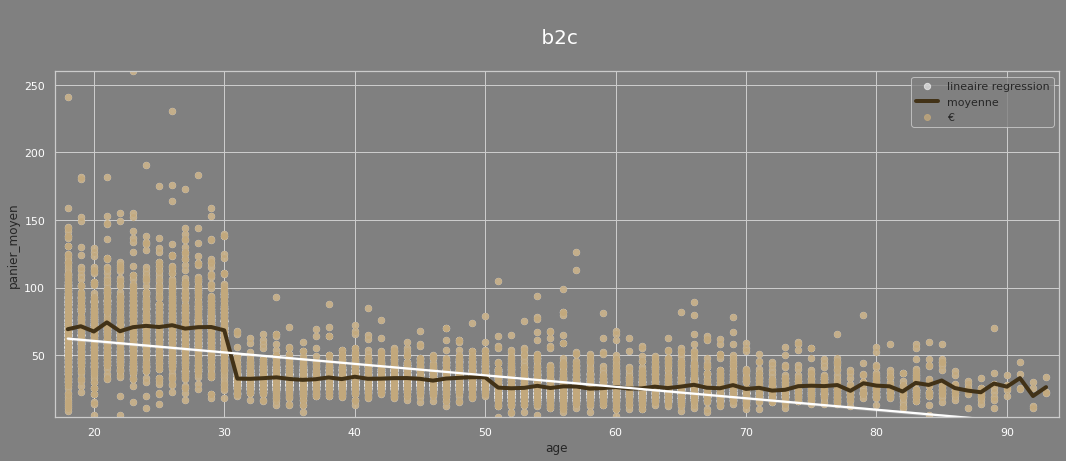

In [14]:
plt.figure(figsize=(18,14))
plt.subplot(2,1,1)
plt.scatter(CA_b2c["age"], CA_b2c["panier_moyen"], alpha=0.6, s=40,color="white")
plt.plot(CA_b2c.groupby("age").mean()["panier_moyen"],color="#423217",linewidth=4)
plt.title('')
plt.title('\n b2c\n',fontsize=20,color="white") # titre
plt.xlabel('Age') # axes
plt.ylabel('Panier moyen') # axes
plt.yticks(color="white")
sns.regplot(x = CA_b2c["age"], y = CA_b2c["panier_moyen"],data= CA_b2c,line_kws={"color": 'white'})
plt.legend(title='',labels=["lineaire regression",'moyenne','€'])
plt.xticks(color="white")
plt.ylim(min(CA_b2c["panier_moyen"]),max(CA_b2c["panier_moyen"]))
plt.xlim(min(CA_b2c['age'])-1,max(CA_b2c['age'])+1)
plt.savefig('Age panier_moyen', dpi=300, bbox_inches='tight')



In [15]:
normaltest(CA_b2c["age"])


NormaltestResult(statistic=504.23834085051374, pvalue=3.2065314382236354e-110)

In [16]:
normaltest(CA_b2c["panier_moyen"])


NormaltestResult(statistic=3422.7035148825576, pvalue=0.0)

In [17]:

data = CA_b2c["panier_moyen"]
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=3422.704, p=0.000
Probably not Gaussian


In [18]:

stat, p = spearmanr(CA_b2c["age"], CA_b2c["panier_moyen"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.701, p=0.000
Probably dependent


https://www.alliage-ad.com/data-science/comment-etudier-la-liaison-entre-une-variable-quantitative-et-une-variable-qualitative/